<a href="https://colab.research.google.com/github/MiguelSilva07/RNA-do-Zero/blob/main/Rede_Neural_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

## Dataset MNISTA

In [2]:
transform = transforms.ToTensor() #definindo a conversão de imagem para o tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17566420.10it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 523925.18it/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4437895.06it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 913957.43it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



## Representação de imagens

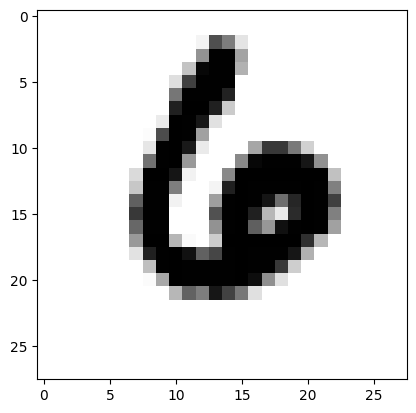

In [3]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap="gray_r");

In [9]:
print(imagens[0].shape) # verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # verificar as dimensões do tensor de cada etiqueta


torch.Size([1, 28, 28])
torch.Size([])


## Estrutura da rede neural

In [5]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) # camada de entrada, 784 neurônios que se ligam a 128
    self.linear2 = nn.Linear(128, 64) # camada interna 1, 128 neurônios que se ligam a 64
    self.linear3 = nn.Linear(64, 10) # camada internet 2, 64 neurônios que se ligam a 10
# para a camada de saida não é necessário definir nada pois só precisar pegaar o output da camada interna 2

  def forward(self,X):
    X = F.relu(self.linear1(X)) # função de ativação da camada de entrada para a camada interna 1
    x = F.relu(self.linear2(X)) # função de ativação da camada interna 1 para a camada interna 2
    x = self.linear3(X) # função de ativação da camada interna 2 para a camada de saída, nesse caso f(x) = x
    return F.log_softmax(X, dim=1) # dados utilizados para calcular a perda


## Treinando a rede neural

In [6]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()

  criterio = nn.NLLLoss()
  EPOCHS = 100
  modelo.train()

  for epoch in range(EPOCHS):
    perda_acumulada = 0

    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens.shape[0], -1)
      otimizador.zero_grad()

      output = modelo(imagens.to(device))
      perda_instantanea = criterio(output, etiquetas.to(device))

      perda_instantanea.backward()

      otimizador.step()

      perda_acumulada += perda_instantanea.item()

    else:
        print("Epoch {} - perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em minutos) =",(time()-inicio)/60)




## Validação da rede

In [7]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0,0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)

      with torch.no_grad():
        logps = modelo(img.to(device))

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]

      if(etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas += 1

      print("Total de imagens testadas =", conta_todas)
      print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))

##Leitura do modelo

In [8]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)